<b>Barack Hussein Obama II 44th President of USA tenure January 20, 2009 – January 20, 2017</b>

## Question

Any change Barack Hussein Obama bring in Unemployment rate in USA?

## Hypothesis

<b>Null Hypothesis:</b> There is no difference in Unemloyment Rate in USA in 2009 and 2016 <br>
<b>Alternate Hypothesis</b> There is a difference in Umemployment Rate in 2009 and 2016 

## Data Sources

<b>Data Source 1</b>

<b>Description:-</b>This data represents the Local Area Unemployment Statistics from 1990-2016, broken down by State and month. This data doesn't require any permissions and was uploaded with the intent for EDA, and the data itself is pulled from this mapping site:


<b>Columns</b><br>
Year:- Year<br>
Month :- Month of that Year<br>
State:- US State<br>
County:- County inside the US State<br>
Rate:- UnEmployment Rate<br>

<b>Data Source 2</b>

<b>Description:-</b> This dataset provides the minimum wage data set by each state and the federal government from 1968 to 2020. This is a cleaned dataset of US state and federal minimum wages from 1968 to 2020 (including 2020 equivalency values). The data was scraped from the United States Department of Labor's table of minimum wage by state.

<b>Columns</b><br>
Year:- The year of the data.<br>
State:- The state or territory of the data.<br>
Effective.Minimum.Wage: The minimum wage that is enforced in the State on January 1 of the Year. Because the federal minimum wage takes effect if the State's minimum wage is lower than the federal minimum wage, this is the higher of the two.<br>
CPI.Average: The average value of the Consumer Price Index in Year. When I pulled the data from the Bureau of Labor Statistics.<br>

In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from scipy import stats
import seaborn as sns

In [3]:
# reading Files
File = pd.read_csv('output.csv')
File2 = pd.read_csv('Minimum Wage Data.csv',encoding='cp1252')

In [4]:
# DataSet 1
File

Year     Month        State              County  Rate
0       2015  February  Mississippi       Newton County   6.1
1       2015  February  Mississippi       Panola County   9.4
2       2015  February  Mississippi       Monroe County   7.9
3       2015  February  Mississippi        Hinds County   6.1
4       2015  February  Mississippi       Kemper County  10.6
...      ...       ...          ...                 ...   ...
885543  2009  November        Maine     Somerset County  10.5
885544  2009  November        Maine       Oxford County  10.5
885545  2009  November        Maine         Knox County   7.5
885546  2009  November        Maine  Piscataquis County  11.3
885547  2009  November        Maine    Aroostook County   9.0

[885548 rows x 5 columns]

In [5]:
# Dataset 2
File2

Year          State  State.Minimum.Wage  \
0     1968        Alabama             0.00000   
1     1968         Alaska             2.10000   
2     1968        Arizona             0.46800   
3     1968       Arkansas             0.15625   
4     1968     California             1.65000   
...    ...            ...                 ...   
2857  2020       Virginia             7.25000   
2858  2020     Washington            13.50000   
2859  2020  West Virginia             8.75000   
2860  2020      Wisconsin             7.25000   
2861  2020        Wyoming             5.15000   

      State.Minimum.Wage.2020.Dollars  Federal.Minimum.Wage  \
0                                0.00                  1.15   
1                               15.61                  1.15   
2                                3.48                  1.15   
3                                1.16                  1.15   
4                               12.26                  1.15   
...                               ...                   ...   
2857                             7.25                  7.25   
2858                            13.50                  7.25   
2859                             8.75                  7.25   
2860                             7.25                  7.25   
2861                             5.15                  7.25   

      Federal.Minimum.Wage.2020.Dollars  Effective.Minimum.Wage  \
0                                  8.55                    1.15   
1                                  8.55                    2.10   
2                                  8.55                    1.15   
3                                  8.55                    1.15   
4                                  8.55                    1.65   
...                                 ...                     ...   
2857                               7.25                    7.25   
2858                               7.25                   13.50   
2859                               7.25                    8.75   
2860                               7.25                    7.25   
2861                               7.25                    7.25   

      Effective.Minimum.Wage.2020.Dollars  CPI.Average  \
0                                    8.55        34.80   
1                                   15.61        34.80   
2                                    8.55        34.80   
3                                    8.55        34.80   
4                                   12.26        34.80   
...                                   ...          ...   
2857                                 7.25       258.66   
2858                                13.50       258.66   
2859                                 8.75       258.66   
2860                                 7.25       258.66   
2861                                 7.25       258.66   

     Department.Of.Labor.Uncleaned.Data  \
0                                   ...   
1                                   2.1   
2                   18.72 - 26.40/wk(b)   
3                           1.25/day(b)   
4                               1.65(b)   
...                                 ...   
2857                            7.25[c]   
2858                               13.5   
2859                               8.75   
2860                               7.25   
2861                               5.15   

      Department.Of.Labor.Cleaned.Low.Value  \
0                                   0.00000   
1                                   2.10000   
2                                   0.46800   
3                                   0.15625   
4                                   1.65000   
...                                     ...   
2857                                7.25000   
2858                               13.50000   
2859                                8.75000   
2860                                7.25000   
2861                                5.15000   

      Department.Of.Labor.Cleaned.Low.Value.2020.Dollars  \
0               

In [6]:
# Naming Columns
File2.columns = ['Year_1','State_1','State.Minimum.Wage','State.Minimum.Wage.2020.Dollars','Federal.Minimum.Wage','Federal.Minimum.Wage.2020.Dollars','Effective.Minimum.Wage','Effective.Minimum.Wage.2020.Dollars','CPI.Average','Department.Of.Labor.Uncleaned.Data','Department.Of.Labor.Cleaned.Low.Value','Department.Of.Labor.Cleaned.Low.Value.2020.Dollars','Department.Of.Labor.Cleaned.High.Value','Department.Of.Labor.Cleaned.High.Value.2020.Dollars','Footnote']

## Data Inconsistencies


1) The States for target years are only 44<br>
2) Some months were missing from the year 2009 and year 2016,so had to remove them

<b>Better Clean first before merging to save memory</b>

# Data Cleaning

1) Created different DataFrames for target months<br>
2) Reduced the no of years to the period from 2009 to 2016 in both the Data Sets.<br>
3) Removed States which were not common in both the datasets.<br>
4) Removed Unnecessary columns not used for Analysis.<br>
5) dropped three States from the Year 2016 as those States were not present in 2009.<br>
6) Removed Months in the target Years that were not common<br>
7) As there was no missing data, no Imputing was done, The data came pretty much cleaned.<br>
8) The data from 2009 to 2016 is our main focus

In [7]:
# Dropping all the other years leaving 2009,2010,2011,2012,2013,2014,2015,2016 in the dataset as Second dataset has same years
dropped_year  = File2[File2['Year_1'].isin([2009,2010,2011,2012,2013,2014,2015,2016])]

In [8]:
# Dropping unnecessary Columns
dropped_year.drop(['Footnote','Department.Of.Labor.Uncleaned.Data','Effective.Minimum.Wage.2020.Dollars','State.Minimum.Wage','State.Minimum.Wage.2020.Dollars','Federal.Minimum.Wage','Federal.Minimum.Wage.2020.Dollars','Department.Of.Labor.Cleaned.Low.Value','Department.Of.Labor.Cleaned.Low.Value.2020.Dollars','Department.Of.Labor.Cleaned.High.Value','Department.Of.Labor.Cleaned.High.Value.2020.Dollars'],axis = 1, inplace = True)

C:\Users\satyaki dixit\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [9]:
# Doing an intersection of State so that both the sets have same states
fir_set = set(dropped_year.State_1.unique())
second_set = set(File.State.unique())
prob = list(fir_set and second_set)

In [10]:
# Dropped states which were not common
dropped_year  = dropped_year[dropped_year['State_1'].isin(prob)]

In [11]:
# Merging the Datasets 
merged_dataset = pd.merge(File,dropped_year, left_on = ['Year','State'] , right_on = ['Year_1','State_1'] , how = 'inner')

In [12]:
# Creating a pickle file for merged data
merged_dataset.to_pickle('data1.pk1')

In [13]:
# Reading the Pickle File
pickled_data = pd.read_pickle('data1.pk1')

In [14]:
pickled_data

Year     Month        State               County  Rate  Year_1  \
0       2015  February  Mississippi        Newton County   6.1    2015   
1       2015  February  Mississippi        Panola County   9.4    2015   
2       2015  February  Mississippi        Monroe County   7.9    2015   
3       2015  February  Mississippi         Hinds County   6.1    2015   
4       2015  February  Mississippi        Kemper County  10.6    2015   
...      ...       ...          ...                  ...   ...     ...   
265054  2009  November     Michigan       Newaygo County  13.1    2009   
265055  2009  November     Michigan          Kent County  10.5    2009   
265056  2009  November     Michigan  Presque Isle County  17.7    2009   
265057  2009  November     Michigan          Luce County  14.4    2009   
265058  2009  November     Michigan     Van Buren County  12.5    2009   

            State_1  Effective.Minimum.Wage  CPI.Average  
0       Mississippi                    7.25      237.017  
1       Mississippi                    7.25      237.017  
2       Mississippi                    7.25      237.017  
3       Mississippi                    7.25      237.017  
4       Mississippi                    7.25      237.017  
...             ...                     ...          ...  
265054     Michigan                    7.40      214.537  
265055     Michigan                    7.40      214.537  
265056     Michigan                    7.40      214.537  
265057     Michigan                    7.40      214.537  
265058     Michigan                    7.40      214.537  

[265059 rows x 9 columns]

In [15]:
# Dropping Repeated Columns
pickled_data.drop(['Year_1'], axis = 1,inplace = True)
pickled_data.drop(['State_1'], axis = 1,inplace = True)

In [16]:
# Filtered data for the Year 2009
data_2009 = pickled_data.loc[pickled_data['Year'] == 2009]

In [17]:
# Filtering the data for the Year 2016
data_2016 = pickled_data.loc[pickled_data['Year'] == 2016]

In [18]:
# Filtering States that are not present in 2009
data_2016 = data_2016[~data_2016['State'].isin(['Virginia', 'Kentucky', 'Texas'])]

In [19]:
# Removing not common months between 2009 and 2016 data
data_2016.drop(data_2016[data_2016['Month'].isin(['August', 'May', 'January', 'September', 'April','December', 'July'])].loc[data_2016['State'] == 'Louisiana'].index, axis=0,inplace=True)
data_2009.drop(data_2009[data_2009['Month'].isin(['November'])].loc[data_2009['State'] == 'Louisiana'].index, axis=0,inplace=True)
data_2009.drop(data_2009[data_2009['Month'].isin(['May'])].loc[data_2009['State'] == 'California'].index, axis=0,inplace=True)
data_2016.drop(data_2016[data_2016['Month'].isin(['February', 'October', 'March', 'August', 'May', 'January', 'June','September', 'April', 'December', 'July'])].loc[data_2016['State'] == 'Michigan'].index, axis=0,inplace=True)

C:\Users\satyaki dixit\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## Data characterization

In [20]:
pickled_data.dtypes

Year                        int64
Month                      object
State                      object
County                     object
Rate                      float64
Effective.Minimum.Wage    float64
CPI.Average               float64
dtype: object

In [21]:
pickled_data.describe()

Year           Rate  Effective.Minimum.Wage    CPI.Average
count  265059.000000  265059.000000           265059.000000  265059.000000
mean     2012.590868       7.225231                7.419170     229.606156
std         2.252557       3.150401                0.524126       8.500338
min      2009.000000       0.900000                6.550000     214.537000
25%      2011.000000       4.900000                7.250000     224.939000
50%      2013.000000       6.800000                7.250000     232.957000
75%      2015.000000       9.000000                7.250000     237.017000
max      2016.000000      31.900000               10.000000     240.007000

In [22]:
# Checking for Null Values
pickled_data.isna().sum()

Year                      0
Month                     0
State                     0
County                    0
Rate                      0
Effective.Minimum.Wage    0
CPI.Average               0
dtype: int64

In [23]:
data_2009.shape

(26861, 7)

In [24]:
data_2016.shape

(26861, 7)

## Analysis

In [25]:
# Clearing warning signs
import warnings
warnings.filterwarnings(action = 'ignore')

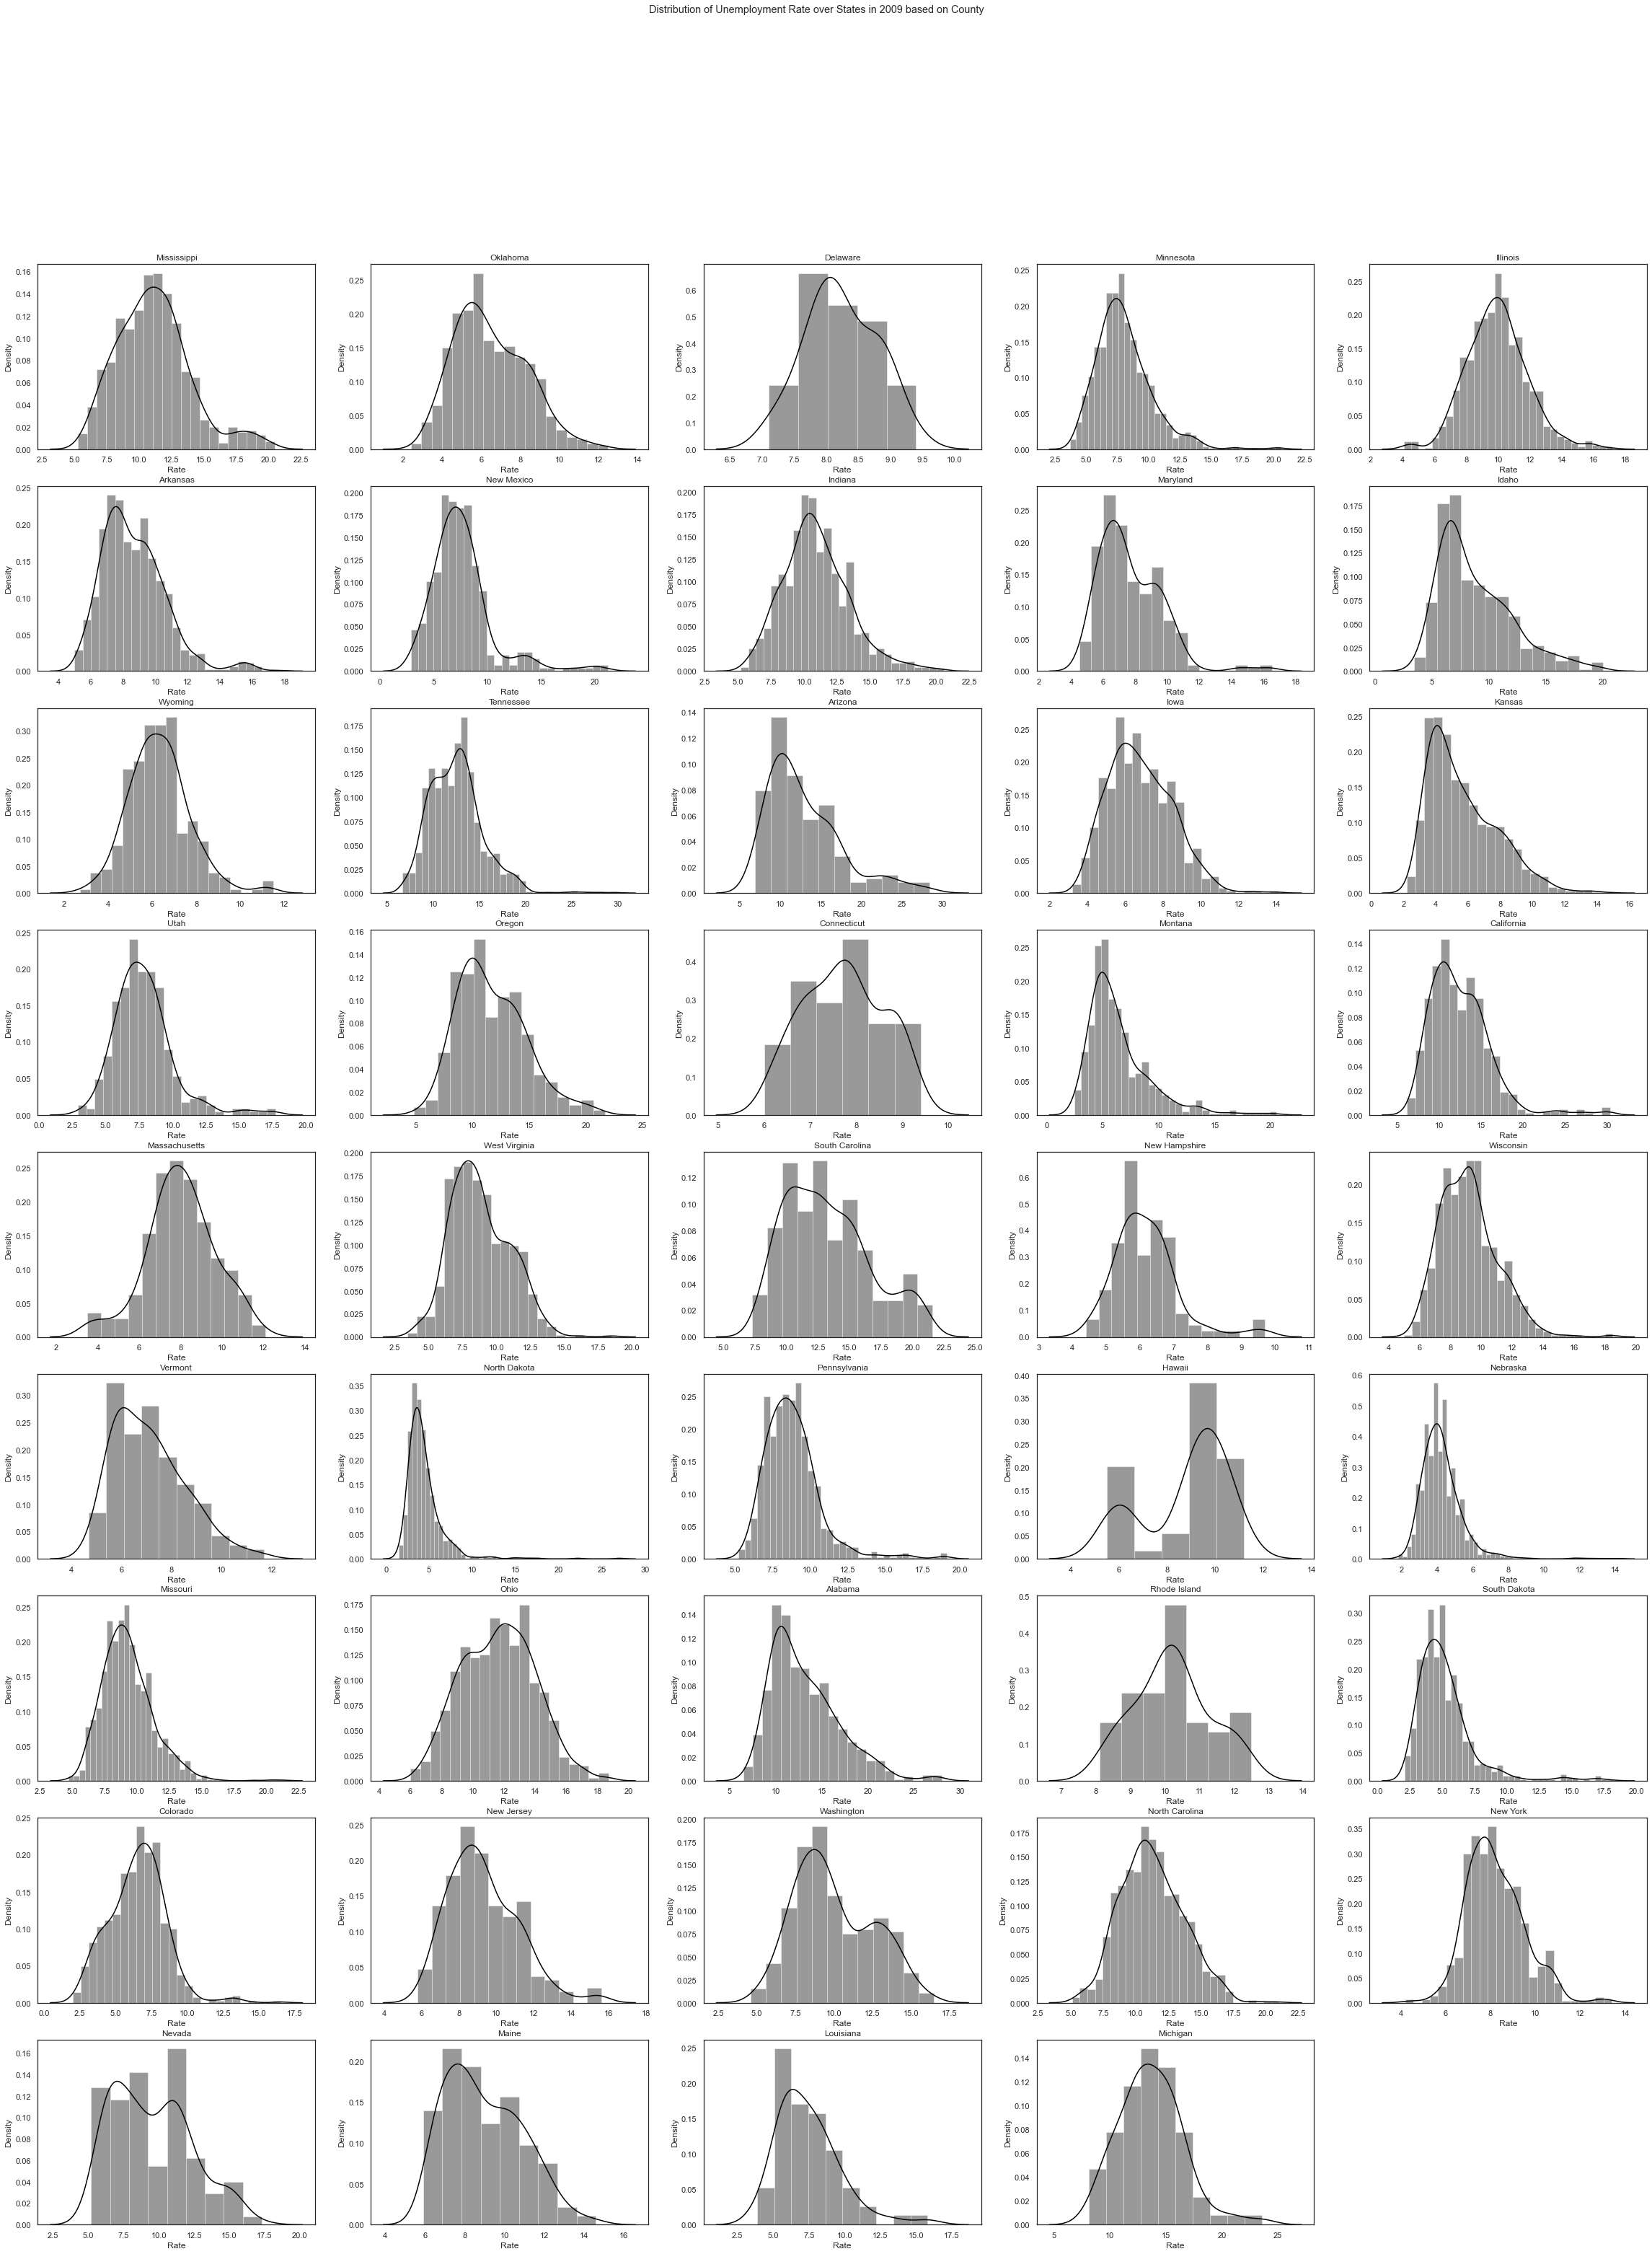

In [26]:
# Creating Distribution of all the States based on County for the Year 2009
import warnings
warnings.filterwarnings(action = 'ignore')
sns.set(style="white", palette="muted", color_codes=True)
fig, ax = plt.subplots(9,5, figsize=(40, 50))
fig.suptitle('Distribution of Unemployment Rate over States in 2009 based on County')
i = 0
j = 0
norm = {}
st_emp = {}
fig.delaxes(ax[8][4])
for state in list(data_2009.State.unique()):
    sns.distplot(data_2009[data_2009['State'] == state].Rate, color="black", ax=ax[i, j])
    norm[state] = stats.shapiro(data_2009[data_2009['State'] == state].Rate)[1]
    ax[i, j].set_title(state)
    j = j + 1
    if j == 5:
        i = i + 1
        j = 0

<b>Test of Normality for all Distributions</b>

In [27]:
# Checking for normal distribution
norm_States = []
non_norm_states = []
# Test for Normality result for all States
for key,value in norm.items():
    if value > 0.05:
        norm_States.append(key)
    else:
        non_norm_states.append(key)

In [28]:
norm_States

['Delaware', 'Massachusetts', 'Rhode Island', 'Michigan']

<b>All these Inference pertains to the Year 2009:-</b> <br>
The minimum(0<Rate<=10) scale of UnEmployment Rate is in the state of Delaware, Connecticut.<br>
Except for Delaware, Oklahoma, Wyoming, Connecticut, New Hampshire,  Massachusetts, Vermont, Hawai, Nebraska, Rhode Island, New York, all other states have Maximum Scale(Rate>15) for UnEmployment.<br>
(Assuming a 95% Confidence Level)states, where the Distribution of UnEmployment is normal, are Delaware, Massachusetts, Rhode Island, and Michigan.<br>
All other states have a non normally Distribution.<br>
The state that has a minimum range is Delaware that is 3.5.<br>
The state that has the maximum range is North Dakota that is 30.<br>
Hawaii has a bimodal Curve.<b>

    





##  Which County has the maximum Unemployment Rate in 2009?

In [29]:
data_2009[data_2009['Rate'] == max(data_2009.Rate)]

Year Month       State           County  Rate  Effective.Minimum.Wage  \
251702  2009  July  California  Imperial County  30.3                     8.0   

        CPI.Average  
251702      214.537

<b>The Imperial County in the State of California has the maximum UnEmployment Rate of 30.3 according to the data, and the Effective Minimum Wage in California was 8.</b>

## Which County has the minimum Unemployment Rate in 2009?

In [30]:
data_2009[data_2009['Rate'] == min(data_2009.Rate)]

Year      Month         State           County  Rate  \
254727  2009  September  North Dakota  Billings County   1.5   

        Effective.Minimum.Wage  CPI.Average  
254727                    6.55      214.537

<b>The Billings County in the State of North Dakota has the minimum UnEmployment Rate of 1.5 according to the data, However, the Effective Minimum Wage in North Dakota was 6.55.</b>

## Which State/States have minimum effective minimum Wage in 2009?

In [31]:
States = list(data_2009[data_2009['Effective.Minimum.Wage'] == min(data_2009['Effective.Minimum.Wage'])]['State'].unique())

In [32]:
data_2009[data_2009['Effective.Minimum.Wage'] == min(data_2009['Effective.Minimum.Wage'])]['Effective.Minimum.Wage'].unique()

array([6.55])

<b>All the States Mississippi,
  Oklahoma ,
  Minnesota ,
  Arkansas ,
  Indiana ,
  Maryland ,
  Idaho ,
  Wyoming ,
  Tennessee ,
  Kansas ,
  Utah ,
  Montana ,
  South Carolina ,
  Wisconsin ,
  North Dakota ,
  Nebraska ,
  Alabama ,
  South Dakota ,
  North Carolina ,
  Nevada ,
  Louisiana have an effective minimum wage that is 6.55</b>
  


## Overall UnEmployment Rate in the USA in 2009

In [33]:
# grouping by States
wage_by_state = data_2009.groupby(['State']).mean().reset_index()

In [34]:
# Filtering UnEmployment Rate and States
States = list(wage_by_state['State'])
Unemployment_rate = list(wage_by_state['Rate'])

In [35]:
# US State Codes
us_state_abbrev = {'Alabama': 'AL','Arizona': 'AZ','Arkansas': 'AR','California': 'CA','Colorado': 'CO','Connecticut': 'CT','Delaware': 'DE',
'Hawaii': 'HI','Idaho': 'ID','Illinois': 'IL','Indiana': 'IN','Iowa': 'IA','Kansas': 'KS','Louisiana': 'LA',
'Maine': 'ME','Maryland': 'MD','Massachusetts': 'MA','Michigan': 'MI','Minnesota': 'MN','Mississippi': 'MS','Missouri': 'MO',
'Montana': 'MT','Nebraska': 'NE','Nevada': 'NV','New Hampshire': 'NH','New Jersey': 'NJ','New Mexico': 'NM','New York': 'NY',
'North Carolina': 'NC','North Dakota': 'ND','Ohio': 'OH','Oklahoma': 'OK','Oregon': 'OR','Pennsylvania': 'PA'
,'Rhode Island': 'RI','South Carolina': 'SC','South Dakota': 'SD','Tennessee': 'TN','Utah': 'UT','Vermont': 'VT','Washington': 'WA','West Virginia': 'WV',
'Wisconsin': 'WI','Wyoming': 'WY'
}

In [36]:
import plotly.graph_objects as go

In [37]:
# UnEmoloyment by States
fig = go.Figure(data=go.Choropleth(
    locations=list(us_state_abbrev.values()), 
    z = Unemployment_rate,
    locationmode = 'USA-states', 
    colorscale = 'Blues',
    colorbar_title = "UnEmployment Rate"
))

fig.update_layout(
    title_text = '2009 US UnEmployment Rate by State',
    geo_scope='usa'
)


fig.show()


<b>Michigan had the maximum UnEmployment Rate of 13.66 in the USA in 2009<br>
Nebraska had the minimum Unemployment Rate of 4.24, followed by North Dakota at 4.41 in the USA in 2009<br>
Maryland had a 7.65 UnEmployment Rate in the USA in 2009</b>



In [38]:
# Effective Minimum Wage by State
fig = go.Figure(data=go.Choropleth(
    locations=list(us_state_abbrev.values()), 
    z = wage_by_state['Effective.Minimum.Wage'],
    locationmode = 'USA-states', 
    colorscale = 'Reds',
    colorbar_title = "Effective Minimum Wage"
))

fig.update_layout(
    title_text = '2009 US Effective Minimum Wage by State',
    geo_scope='usa'
)


fig.show()


<b>Maximum Effective Minimum Wage is of Washington that is 8.55<br>
 Maryland had a 6.55 minimum Effective Minimum Wage</b>

In [39]:
Grouped_by_Mon_sta = pickled_data.groupby(['Month','State']).mean().reset_index()

In [40]:
def List_plot(month, state):
    Rate = Grouped_by_Mon_sta[Grouped_by_Mon_sta['State'] == state].loc[Grouped_by_Mon_sta['Month'] == month]
    return float(Rate['Rate'])
    

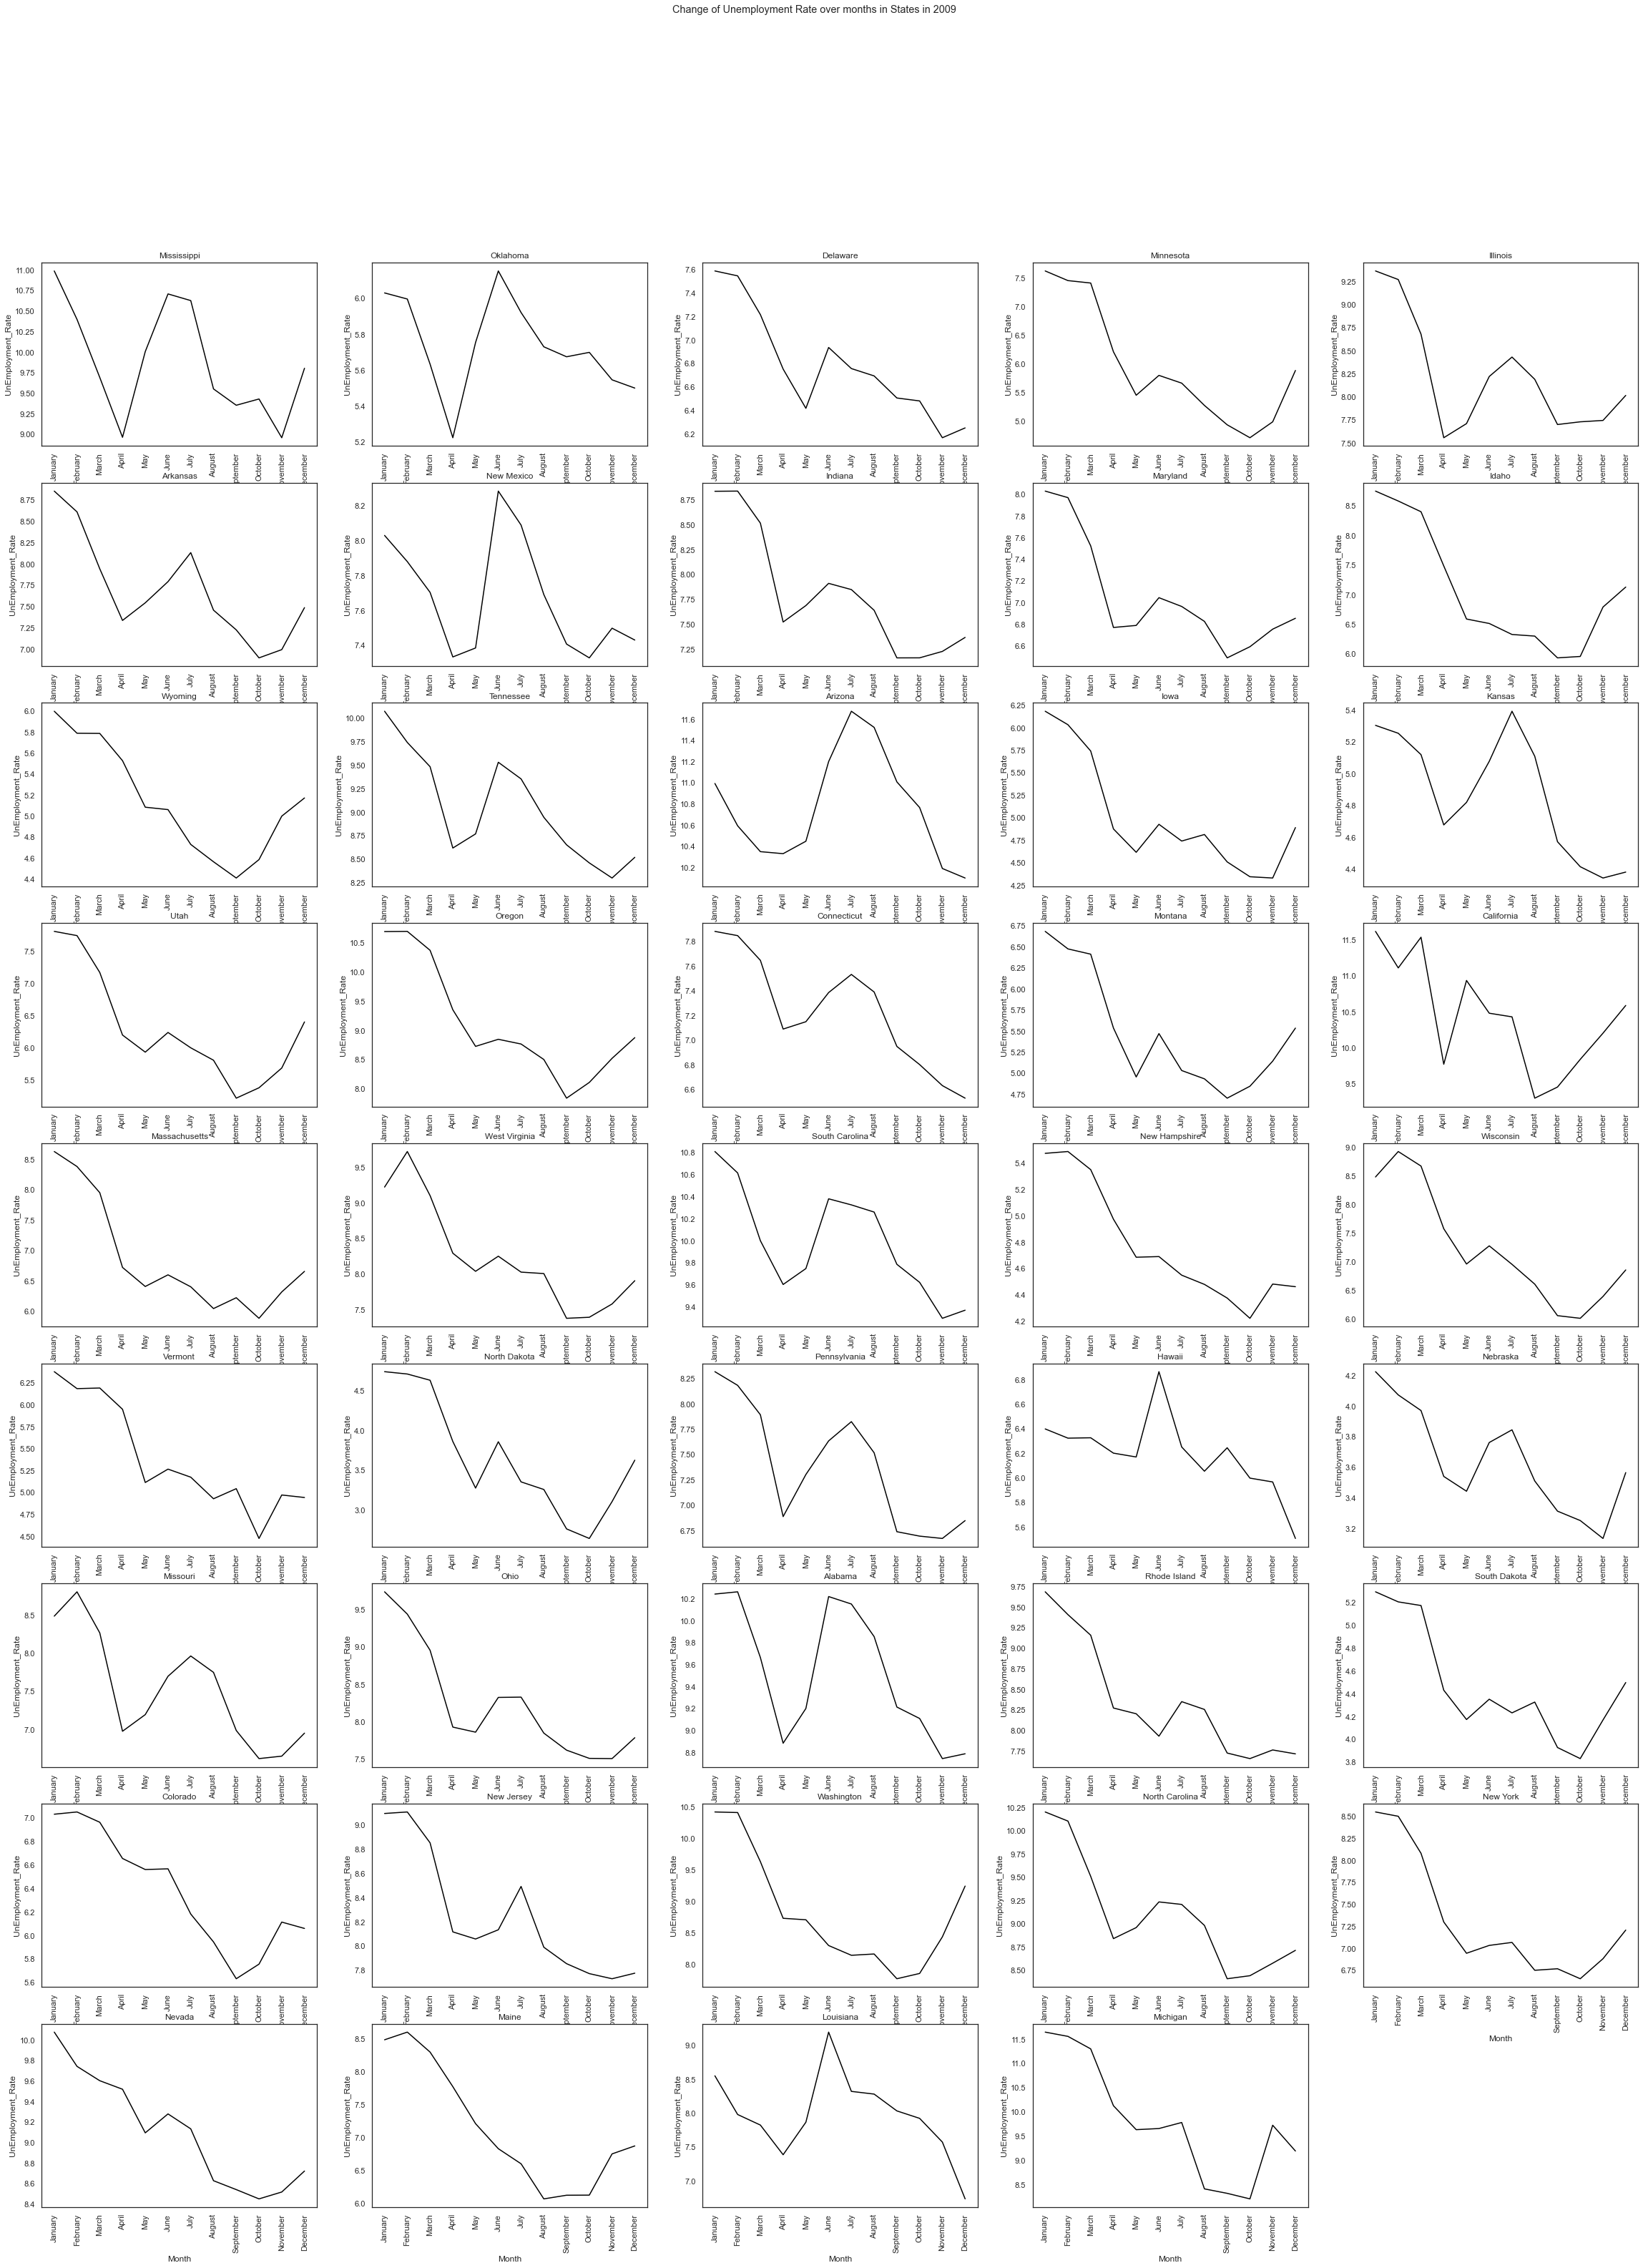

In [41]:
# Change of UnEmployment Rate over months in States in 2009
fig, ax = plt.subplots(9,5, figsize=(40, 50))
fig.suptitle('Change of Unemployment Rate over months in States in 2009')
i = 0
j = 0
counter = 0
List3 = []
fig.delaxes(ax[8][4])
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
for state in list(data_2009.State.unique()):
    List3 = []
    for month in months:
        List3.append(List_plot(month,state))
        counter = counter + 1 
    line = sns.lineplot(months,List3,color="black", ax=ax[i, j])
    ax[i, j].set_title(state)
    ax[i, j].set(xlabel='Month', ylabel='UnEmployment_Rate')
    line.set_xticklabels(months ,rotation=90)
    j = j + 1
    if j == 5:
        i = i + 1
        j = 0

## What all can be Infered from these graphs?

<b>All the below events happened in the Year 2009<br>
In most of the states, there is an increase in the UnEmployment Rate between the month's May and July that is the summer season<br>
In all the states except Arizona, Kansas, Hawaii, Louisiana, Oklahoma The Unemployment Rate at the beginning of the year is generally high<br>
In all the states except Louisiana, Alabama, Hawaii, Connecticut, Arizona, Oklahoma, The Unemployment Rate is minimum in the fall season for their Scale<br>
There are too many ups and downs throughout the Year in the UnEmployment Rate<br>
A state like New Hampshire shows a downward trend throughout the Year<br>
On a Similar Note, New York also shows a downward trend throughout the year except July and year end<br>
In Maryland, there is a sudden decrease in the UnEmployment Rate from February to April with the least Unemployment Rate in September</b>


# 2016 Data

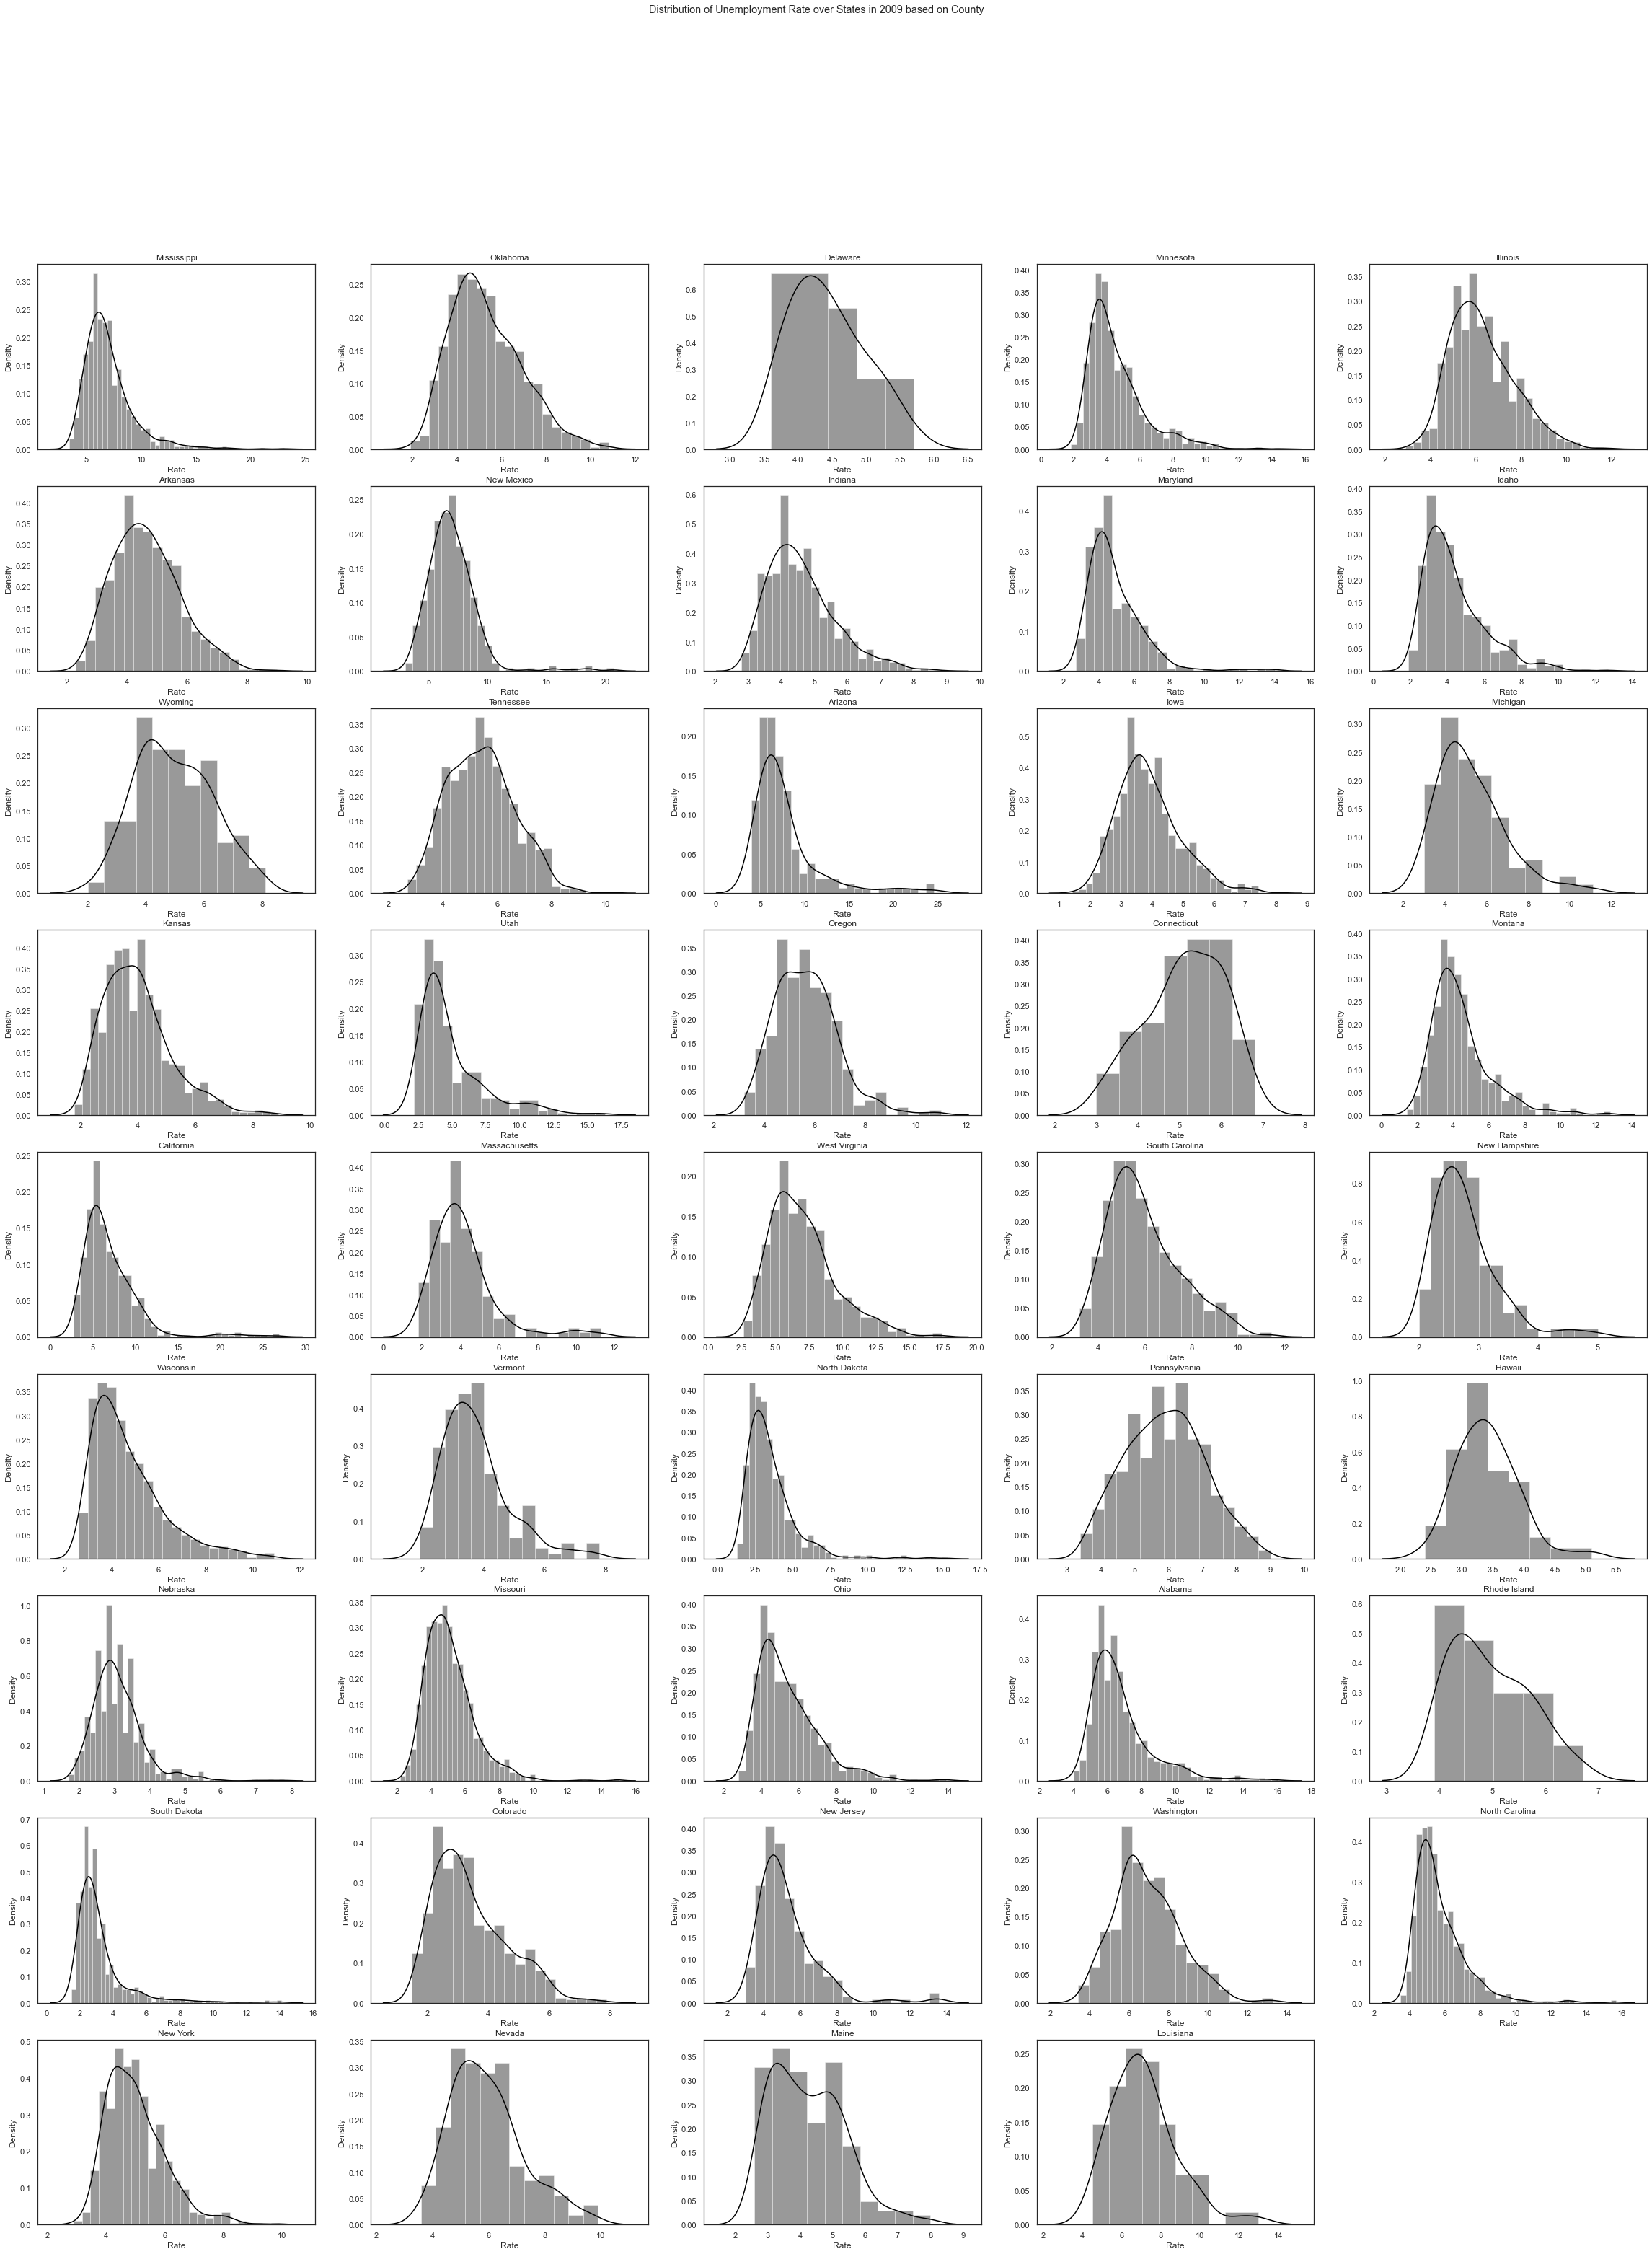

In [42]:
# Distribution of Unemployment Rate over States in 2016 based on County
import warnings
warnings.filterwarnings(action = 'ignore')
sns.set(style="white", palette="muted", color_codes=True)
fig, ax = plt.subplots(9,5, figsize=(40, 50))
fig.suptitle('Distribution of Unemployment Rate over States in 2009 based on County')
i = 0
j = 0
fig.delaxes(ax[8][4])
for state in list(data_2016.State.unique()):
    sns.distplot(data_2016[data_2016['State'] == state].Rate, color="black", ax=ax[i, j])
    norm[state] = stats.shapiro(data_2016[data_2016['State'] == state].Rate)[1]
    ax[i, j].set_title(state)
    j = j + 1
    if j == 5:
        i = i + 1
        j = 0

In [43]:
# Checking for Normal Distribution
norm_States = []
non_norm_states = []
# Test for Normality result for all States
for key,value in norm.items():
    if value > 0.05:
        norm_States.append(key)
    else:
        non_norm_states.append(key)

In [44]:
norm_States

['Delaware', 'Hawaii']

<b>State of Delaware and 'Hawaii' have a normal distribution of UnEmployment Rate(95% Confidence) as compared to 2009 where three States have a normal Distribution<br>
All the other states have a not normal distribution<br>
Delaware, Wyoming, New Hampshire, Connecticut, Hawaii, Nebraska, Vermont, Rhode Island, Colorado, 	Maine, Nevada, New York, Pennsylvania, Kansas, Tennessee, Iowa are the States which have a low Scale(0 is less than Rate, and Rate is less than 10) on Unemployment Rate, which is very good as compared to 2009 where only two states were on the scale of 0 to 10<br>
The states having the maximum scale of Unemployment Rate(rate>15) are Louisiana, North Carolina, South Dakota, Missouri, Alabama, North Dakota, California, West Virginia, Utah, Arizona, Michigan, Maryland, New Mexico, Mississippi, Minnesota, which is better than 2009 when 36 States come in this maximum scale <br>
The state that has minimum range is New Hampshire which is 3 .<br>
The state having the maximum range is California which is 30 .<br>

##  Which County has the maximum Unemployment Rate in 2016?

In [45]:
data_2016[data_2016['Rate'] == max(data_2016.Rate)]

Year Month       State           County  Rate  Effective.Minimum.Wage  \
84084  2016  July  California  Imperial County  26.9                    10.0   

       CPI.Average  
84084      240.007

<b>The Imperial County in the State of California has the maximum UnEmployment Rate of 26.9 , less than in the year 2009 according to the data, and the Effective Minimum Wage in California was 10 greater than in 2009.</b>

##  Which County has the minimum Unemployment Rate in 2016?

In [46]:
data_2016[data_2016['Rate'] == min(data_2016.Rate)]

Year    Month         State          County  Rate  \
86768  2016  October  North Dakota   Towner County   1.3   
86777  2016  October  North Dakota   Steele County   1.3   
86804  2016  October  North Dakota  Lamoure County   1.3   

       Effective.Minimum.Wage  CPI.Average  
86768                    7.25      240.007  
86777                    7.25      240.007  
86804                    7.25      240.007

<b>The Towner County, Steele County, and Lamoure County in the State of North Dakota has the minimum Unemployment Rate of 1.3 according to the data, more number of County had a lower UnEmployment Rate than in 2009, and, The Effective Minimum Wage in North Dakota was 7.25 which is greater than 2009's Effective Minimum Wage.</b>

## Which State/States have minimum effective minimum Wage in 2016?

In [47]:
States = list(data_2016[data_2016['Effective.Minimum.Wage'] == min(data_2016['Effective.Minimum.Wage'])]['State'].unique())

In [48]:
data_2016[data_2016['Effective.Minimum.Wage'] == min(data_2016['Effective.Minimum.Wage'])]['Effective.Minimum.Wage'].unique()

array([7.25])

<b>All the States  Mississippi ,
  Oklahoma ,
  Minnesota ,
  Indiana ,
  Idaho ,
  Wyoming ,
  Tennessee ,
  Iowa ,
  Kansas ,
  Utah ,
  South Carolina ,
  New Hampshire ,
  Wisconsin ,
  North Dakota ,
  Pennsylvania ,
  Ohio ,
  Alabama ,
  North Carolina ,
  Nevada ,
  Louisiana  have effective minimum wage that is 7.25 as compared to 2009 two States have above than minimum Effective minimum Wage   </b>

## Overall UnEmployment Rate in the USA in 2016

In [49]:
# Grouping the Data by State
wage_by_state = data_2016.groupby(['State']).mean().reset_index()

import plotly.graph_objects as go

States = list(wage_by_state['State'])
Unemployment_rate = list(wage_by_state['Rate'])

In [50]:
# 2016 US UnEmployment Rate by State
fig = go.Figure(data=go.Choropleth(
    locations=list(us_state_abbrev.values()), 
    z = Unemployment_rate,
    locationmode = 'USA-states', 
    colorscale = 'reds',
    colorbar_title = "UnEmployment Rate"
))

fig.update_layout(
    title_text = '2016 US UnEmployment Rate by State',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

<b>The State which had maximum UnEmployment is Arizona, but the Rate is very less as compared to the year 2009<br>
There was a huge decrease in the UnEmployment Rate for South Carolina as compared to the Year 2009<br>
The state which is minimum UnEmployment is Nevada<br>


In [51]:
# 2016 US Effective Minimum Wage by State
fig = go.Figure(data=go.Choropleth(
    locations=list(us_state_abbrev.values()), 
    z = wage_by_state['Effective.Minimum.Wage'],
    locationmode = 'USA-states', 
    colorscale = 'greens',
    colorbar_title = "Effective Minimum Wage"
))

fig.update_layout(
    title_text = '2016 US Effective Minimum Wage by State',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

<b>Maximum Effective Minimum Wage is of California that is 10<br>
Washington Effective Minimum Wage got increased from 8.55 to 9.47<br> 
Maryland had an 8.75 minimum Effective Minimum Wage which is much more than in 2009 that is 6.55 </b>

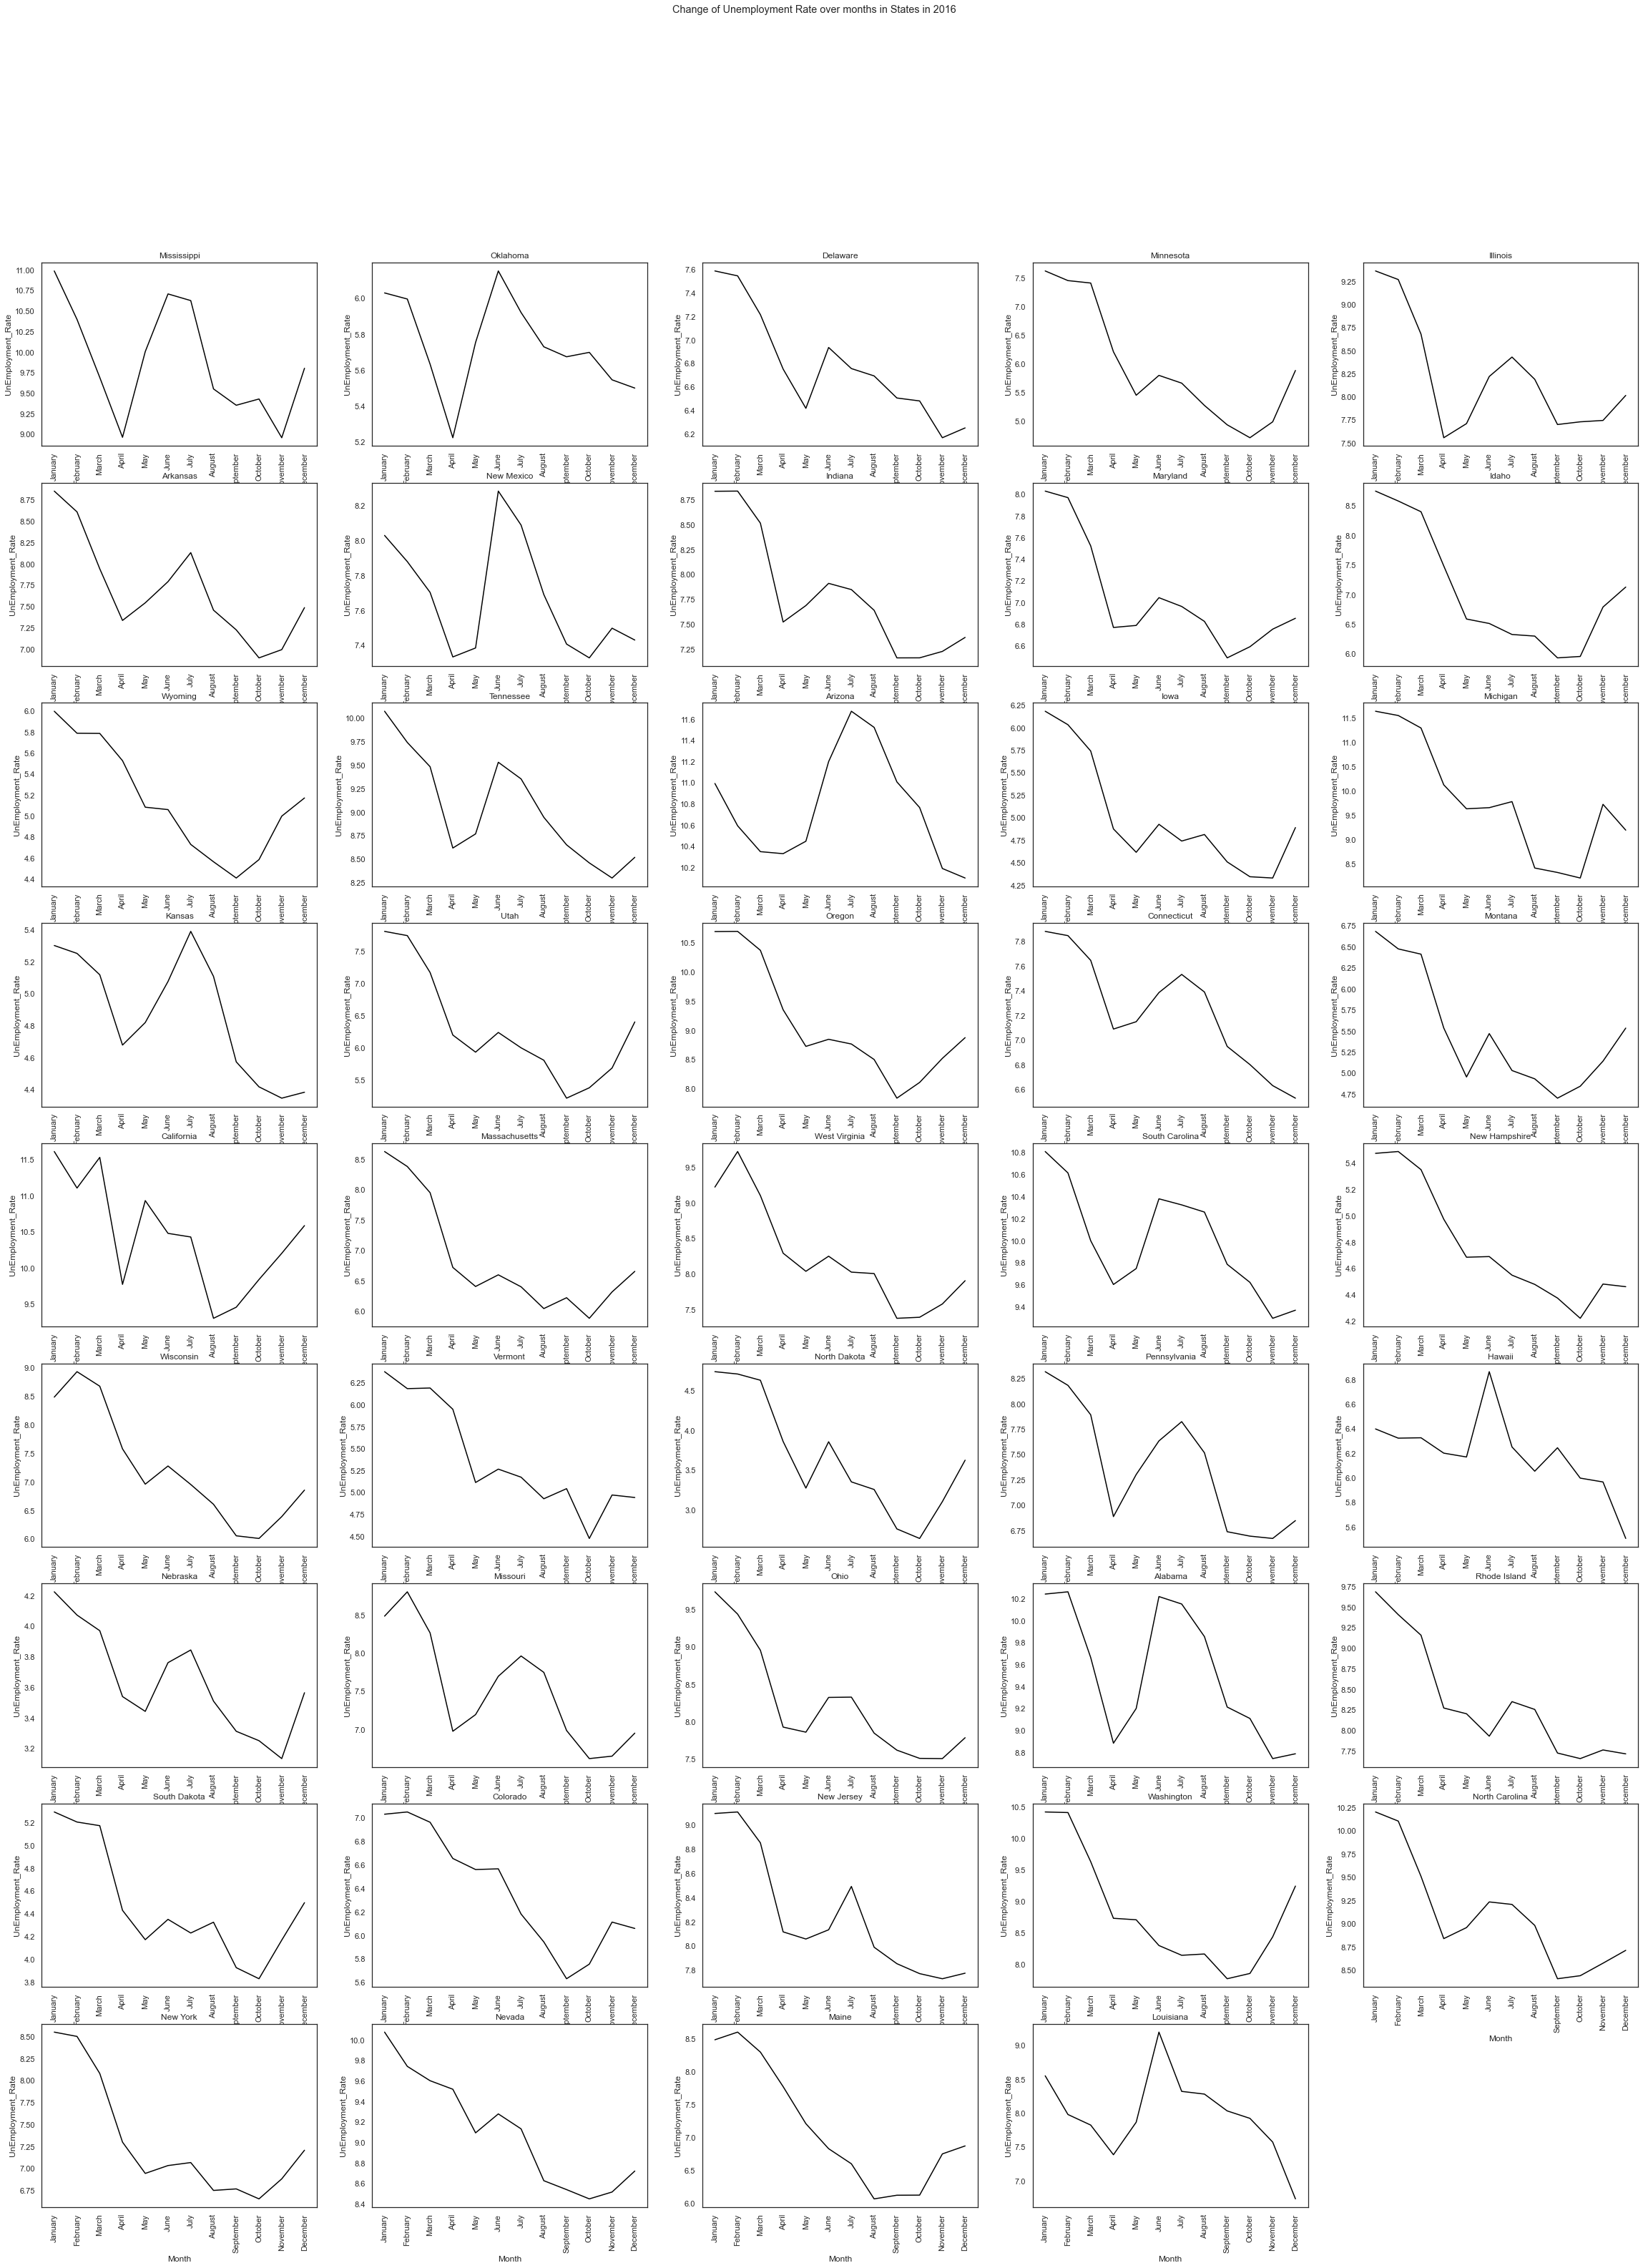

In [52]:
# Change of Unemployment Rate over months in States in 2016
fig, ax = plt.subplots(9,5, figsize=(40, 50))
fig.suptitle('Change of Unemployment Rate over months in States in 2016')
i = 0
j = 0
counter = 0
List3 = []

fig.delaxes(ax[8][4])
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
for state in list(data_2016.State.unique()):
    List3 = []
    for month in months:
        List3.append(List_plot(month,state))
        counter = counter + 1 
    line = sns.lineplot(months,List3,color="black", ax=ax[i, j])
    ax[i, j].set_title(state)
    ax[i, j].set(xlabel='Month', ylabel='UnEmployment_Rate')
    line.set_xticklabels(months ,rotation=90)
    j = j + 1
    if j == 5:
        i = i + 1
        j = 0

<b>All the below events happened in the Year 2016<br>
In all the States there is an increase in the UnEmployment Rate between the month's May and July that is the summer season<br>
In all the states except Louisiana, Hawaii, West Virginia, Kansas, Arizona, New Mexico, and, Oklahoma the Unemployment Rate at the beginning of the year is generally maximum as compared to respective rates throughout the year<br>
In all the states except Hawaii, Alabama, Arizona, and Oklahoma The Unemployment Rate is minimum in the fall season concerning their Scale<br>
There are too many ups and downs throughout the Year in the UnEmployment Rate<br>
New Hampshire shows a downward trend throughout the year till October<br>
Most of the States have a sharp transition across the months
</b>


In [53]:
Aggregate_Data = pickled_data.groupby('Year').mean().reset_index()

In [54]:
Aggregate_Data

Year      Rate  Effective.Minimum.Wage  CPI.Average
0  2009  8.883838                6.937995      214.537
1  2010  9.189580                7.351247      218.056
2  2011  8.523477                7.361294      224.939
3  2012  7.657544                7.386022      229.594
4  2013  7.211610                7.401148      232.957
5  2014  6.096365                7.481625      236.736
6  2015  5.401873                7.602596      237.017
7  2016  5.160680                7.731633      240.007

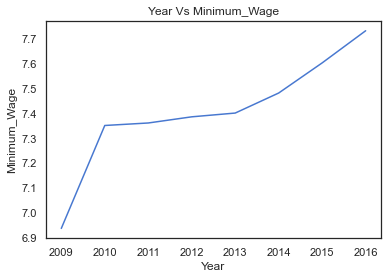

In [55]:
# minimum wage trend over the years from 2009 to 2016 in USA
plt.plot(Aggregate_Data['Year'], Aggregate_Data['Effective.Minimum.Wage'])
plt.title('Year Vs Minimum_Wage')
plt.xlabel('Year')
plt.ylabel('Minimum_Wage')
plt.show()

<b>From the period 2010 to 2013 , The Minimum Wage remains almost constant, no drastic increase or decrease</b><br>
<b>Transition of Minimum Wage from 2009 to 2010 is almost linear<b><br>
<b>From the period of 2013 to 2016, The UnEmployment Rate has increased consistenly</b> 
    

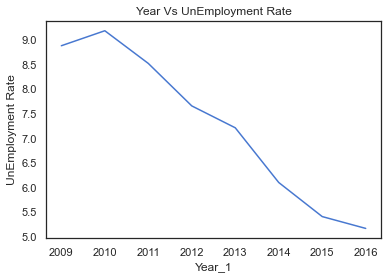

In [56]:
# Unemployment rate over the years from 2009 to 2016 in USA
plt.plot(Aggregate_Data['Year'], Aggregate_Data['Rate'])
plt.title('Year Vs UnEmployment Rate')
plt.xlabel('Year_1')
plt.ylabel('UnEmployment Rate')
plt.show()

<b>Seems Strange that with an increase in Minimum Wage, the Unemployment Rate also increased.</b><br>
<b>From 2010 to 2016 there is an inconsistent downfall in the UnEmployment Rate, but the overall trend is decreasing<b>



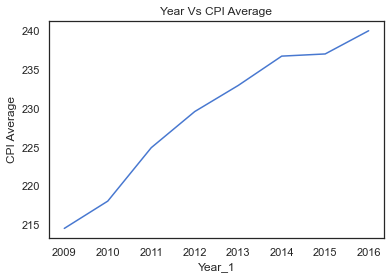

In [57]:
# CPI Average over the years from 2009 to 2016 in USA
plt.plot(Aggregate_Data['Year'], Aggregate_Data['CPI.Average'])
plt.title('Year Vs CPI Average')
plt.xlabel('Year_1')
plt.ylabel('CPI Average')
plt.show()

<b>From 2009 to 2016 there is an inconsistent increase in the CPI Average, but the overall trend is increasing<b>

## Correlation between UnEmployment Rate and Minimum Wage 

In [58]:
from scipy.stats import pearsonr

In [59]:
# Pearson's Correlation Coefficient
corr, _ = pearsonr(pickled_data['Rate'], pickled_data['Effective.Minimum.Wage'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.055


In [60]:
from scipy.stats import spearmanr

In [61]:
# Spearman's Correlation Coefficient
corr, _ = spearmanr(pickled_data['Rate'], pickled_data['Effective.Minimum.Wage'])
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: -0.013


<b>Seeing the Pearson's correlation value and Spearman's correlation value we can say that not much corelation exist between UnEmployment Rate and Effective minimum rate</b>

<b>Checking the Distribution for the Year 2009 & 2016</b>

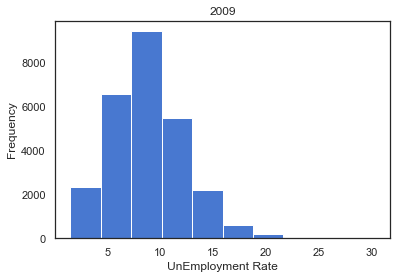

In [62]:
plt.hist(data_2009['Rate'])
plt.title('2009')
plt.xlabel('UnEmployment Rate')
plt.ylabel('Frequency')
plt.show()

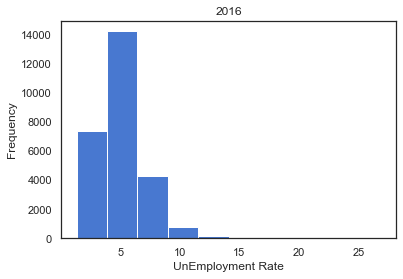

In [63]:
plt.hist(data_2016['Rate'])
plt.title('2016')
plt.xlabel('UnEmployment Rate')
plt.ylabel('Frequency')
plt.show()

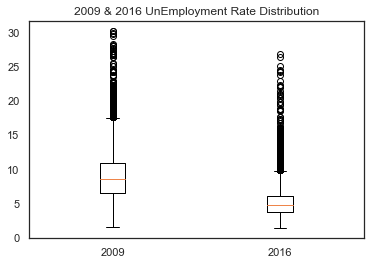

In [64]:
# Box plot for both distribution
data = [data_2009['Rate'],data_2016['Rate']]
fig1, ax1 = plt.subplots()
ax1.set_title('2009 & 2016 UnEmployment Rate Distribution')
ax1.boxplot(data,labels=("2009","2016"))
plt.show()

<b> We cannot remove the Outliers as they contain most of the information about the data</b>

## Test for Normality

In [65]:
stats.shapiro(data_2009['Rate'])

ShapiroResult(statistic=0.9713001847267151, pvalue=0.0)

In [66]:
stats.shapiro(data_2016['Rate'] )

ShapiroResult(statistic=0.9096153378486633, pvalue=0.0)

<b>As an alternative we will use a Non Parametric Test that is Wilcoxon-Mann-Whitney test which does not assume anything about the distribution of the samples</b>

In [67]:
from scipy.stats import mannwhitneyu
# compare samples
stat, p = mannwhitneyu(data_2009['Rate'], data_2016['Rate'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=114454605.000, p=0.000
Different distribution (reject H0)


<b><b>After running the Wilcoxon-Mann-Whitney test we conclude that there is a significant difference between the UnEmployment rate in 2009 and 2016 in the US</b></b>

<u>Conclusion:-</u> <b>We learn that during the tenure of President Barack Hussein Obama II, The president bring about a change in the Unemployment Rate in all the States of the USA, and the Unemployment rate distribution in the Year 2009 is significantly different from the UnEmployment rate distribution in the Year 2016, and From Analysis, we got to know that the change was towards the better side.</b>